# Basic Usage of the SAMOSA+ Waveform Model

In [112]:
from samosa_waveform_model import SAMOSAWaveformModel, ScenarioData
from samosa_waveform_model.scenarios import SurfaceTypeLead, SurfaceTypeSeaIce

## Scenario Data

The specifications of the radar altimeter, Level-1 processing setting and the orbit parameters are named _Scenario Data_. These variables only depend on the platform and its sensor and are independent from surface properties. 

Example scenario data settings are available, in this case for CryoSat-2 in SAR mode: 

In [113]:
scenario_data = ScenarioData.cryosat2_sar_example()

Platform location parameters:

In [114]:
scenario_data.geo

PlatformLocation(latitude=83.9625006, longitude=27.407605, altitude=728518.615, velocity=7518.711587141643, height_rate=0.0, pitch=0.0, roll=0.0, track_sign=0)

Sensor parameters

In [115]:
scenario_data.rp

SensorParameters(platform='cryosat2', sensor='siral', mode='sar', pulses_per_burst=64, range_gates_per_pulse=128, zero_padding_factor=2, pulse_repetition_frequency=18181.8181818181, burst_repetition_interval=0.0117929625, frequency=13575000000.0, bandwidth=320000000.0, beam_width_along=np.float64(0.019198621771937627), beam_width_across=np.float64(0.02129301687433082), num_look_min=-90.0, num_look_max=90.0, beamsamp_factor=1.0)

Radar mode parameters (in this case SAR mode)

In [116]:
scenario_data.sar


SARParameters(look_angles=array([89.43691841, 89.44317488, 89.44943134, 89.4556878 , 89.46194426,
       89.46820072, 89.47445719, 89.48071365, 89.48697011, 89.49322657,
       89.49948304, 89.5057395 , 89.51199596, 89.51825242, 89.52450888,
       89.53076535, 89.53702181, 89.54327827, 89.54953473, 89.55579119,
       89.56204766, 89.56830412, 89.57456058, 89.58081704, 89.5870735 ,
       89.59332997, 89.59958643, 89.60584289, 89.61209935, 89.61835581,
       89.62461228, 89.63086874, 89.6371252 , 89.64338166, 89.64963812,
       89.65589459, 89.66215105, 89.66840751, 89.67466397, 89.68092043,
       89.6871769 , 89.69343336, 89.69968982, 89.70594628, 89.71220275,
       89.71845921, 89.72471567, 89.73097213, 89.73722859, 89.74348506,
       89.74974152, 89.75599798, 89.76225444, 89.7685109 , 89.77476737,
       89.78102383, 89.78728029, 89.79353675, 89.79979321, 89.80604968,
       89.81230614, 89.8185626 , 89.82481906, 89.83107552, 89.83733199,
       89.84358845, 89.84984491, 89.85

## Initialization of SAMOSA waveform model

The purpose of the scenario data is provide all information necessary to initialize the SAMOSA+ Waveform model

In [117]:
waveform_model = SAMOSAWaveformModel(scenario_data)

## Computation of Waveform Model

The next step is to compute a waveform for a specific surface. The required parameters are:

1. Epoch
2. Significant Wave Height
3. Waveform Amplitude
4. Thermal Noise
5. Mean Square Slope

Presets are available. 

### Lead Waveform Example

In [118]:
model_input = SurfaceTypeLead()
model_input


SurfaceTypeLead(epoch=0.0, significant_wave_height=0.1, amplitude=1, thermal_noise=0.0, mean_square_slope=1e-06)

The model input allows to compute the dopper delay waveform. The output is a a

In [119]:
model_result = waveform_model.generate_delay_doppler_waveform(model_input)


The output contains the range gates in seconds, the waveform power and intermediate paramters: 

In [120]:
import dataclasses
print(list(f.name for f in dataclasses.fields(model_result)))

['tau', 'power', 'delay_doppler_map', 'epoch', 'significant_wave_height', 'mean_square_slope', 'amplitude', 'gamma_0']


The computed lead waveform: 

Text(0, 0.5, 'Power (normed)')

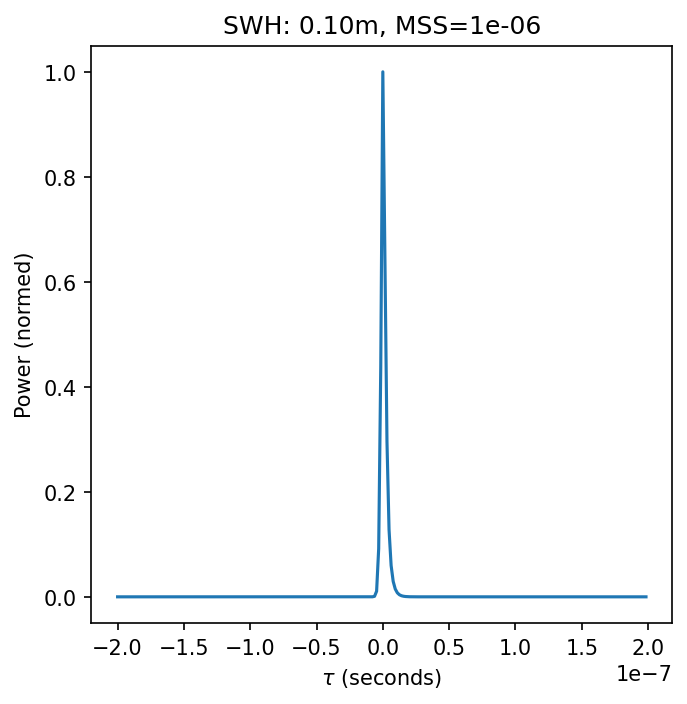

In [121]:
import matplotlib.pyplot as plt

plt.figure(dpi=150, figsize=(5, 5))
plt.plot(model_result.tau, model_result.power)
plt.title(f"SWH: {model_result.significant_wave_height:.2f}m, MSS={model_result.mean_square_slope}")
plt.xlabel(r"$\tau$ (seconds)")
plt.ylabel("Power (normed)")

### Sea Ice Example


Text(0, 0.5, 'Power (normed)')

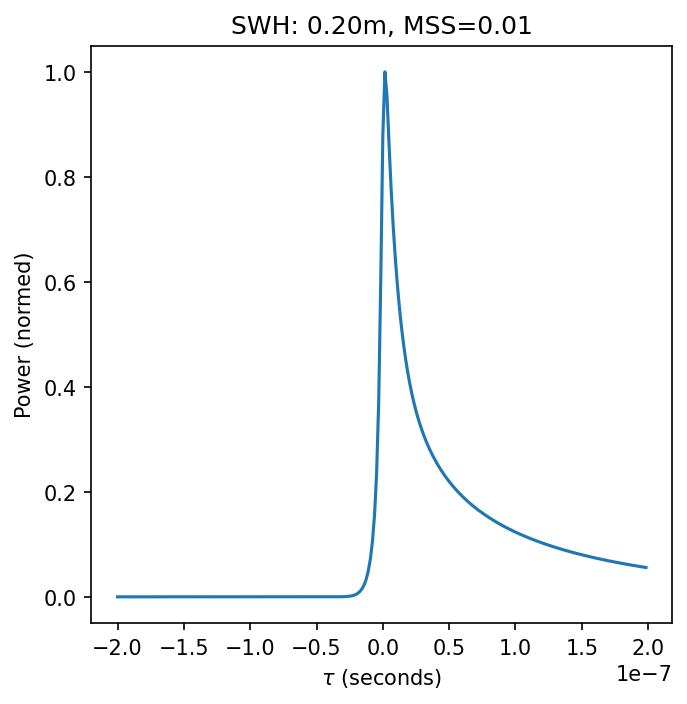

In [122]:
model_input = SurfaceTypeSeaIce()
model_result = waveform_model.generate_delay_doppler_waveform(model_input)

plt.figure(dpi=150, figsize=(5, 5))
plt.plot(model_result.tau, model_result.power)
plt.title(f"SWH: {model_result.significant_wave_height:.2f}m, MSS={model_result.mean_square_slope}")
plt.xlabel(r"$\tau$ (seconds)")
plt.ylabel("Power (normed)")